## ML Algorithms for Identifying DEGs

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# models tried
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Opening the dataset
df = pd.read_table("final/processed_all data_551.txt", sep=" ")
y = df.label
X = df.drop('label', axis=1)
X = X.loc[:, (df != 0).any(axis=0)]

In [3]:
# Dataset shape
print(df.shape)
print(y.shape)
print(X.shape)
y.describe()

(551, 25555)
(551,)
(551, 25165)


count       551
unique        2
top       tumor
freq        502
Name: label, dtype: object

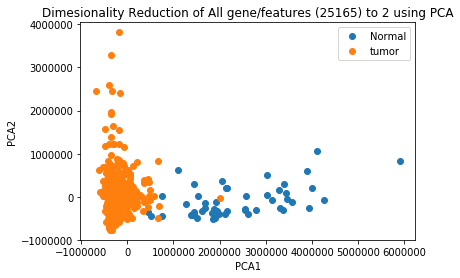

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0],X_pca[:,1])

df2 = pd.DataFrame(dict(x=X_pca[:,0], y=X_pca[:,1], label=y))

groups = df2.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
ax.legend()
plt.title('Dimesionality Reduction of All gene/features (25165) to 2 using PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.savefig('PCA_gini.png')
plt.show()

In [5]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Accuracy = 0.9638009049773756
Number of features used = 1
confusion matrix:
[[ 22   3]
 [  5 191]]

classification_report
              precision    recall  f1-score   support

      Normal       0.81      0.88      0.85        25
       tumor       0.98      0.97      0.98       196

    accuracy                           0.96       221
   macro avg       0.90      0.93      0.91       221
weighted avg       0.97      0.96      0.96       221




[Text(167.4, 163.07999999999998, 'X[314] <= 1304.5\ngini = 0.135\nsamples = 330\nvalue = [24, 306]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 306\nvalue = [0, 306]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

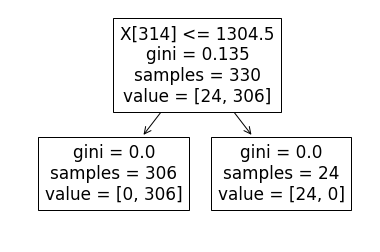

In [6]:
# Training and Testing
DTC = DecisionTreeClassifier()
dtc = DTC.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print('Accuracy =', accuracy_score(y_test,y_pred))
print('Number of features used =', dtc.n_outputs_)

print('confusion matrix:', confusion_matrix(y_test,y_pred), sep='\n')
print()
print('classification_report', classification_report(y_test,y_pred), sep='\n')

print()
plot_tree(dtc)

### 1. Gini Index

In [7]:
# getting the DEGs
nn = np.array(dtc.feature_importances_, dtype=bool)
X.columns[nn]

Index(['ADAMTS8'], dtype='object')

In [8]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area
# from https://planspace.org/2013/06/21/how-to-calculate-gini-coefficient-from-raw-data-in-python/

In [9]:
gs = []
for feature in X.columns:
    gs.append(gini(X[feature]))

# gini_df = pd.DataFrame(list(zip(X.columns, lst2)), columns =['Name', 'val']) 
gini_df = pd.DataFrame(gs, X.columns, columns =['Gini'])


In [10]:
gini_degs_100 = gini_df.sort_values('Gini').head(100).index.values
gini_degs_100

array(['RBM45', 'TARDBP', 'ZMYM6', 'RSRC2', 'HNRNPK', 'OTUD5', 'NRF1',
       'SUPT7L', 'PSMD6', 'SYF2', 'TIAL1', 'PKNOX1', 'ZCCHC8', 'SRSF1',
       'PPP1R7', 'SRSF10', 'MAX', 'SRP19', 'WDR33', 'CERS5', 'ILKAP',
       'RAD17', 'WDR45', 'ARF1', 'UBE2I', 'SRSF2', 'AIMP1', 'ZBTB8OS',
       'HNRNPL', 'NXF1', 'ZNF207', 'RRP8', 'TENT2', 'RNF34', 'EIF2B1',
       'VTI1A', 'TMUB2', 'PPHLN1', 'IST1', 'DAZAP1', 'VEZT', 'CLK3',
       'DNAJC17', 'HNRNPDL', 'ERCC3', 'GLT8D1', 'RBM14', 'SRSF3', 'SIRT6',
       'POLL', 'AUP1', 'RNF10', 'RPP14', 'SRSF4', 'CCDC12', 'PPP1R12A',
       'ZNF143', 'PTBP1', 'RTF2', 'RBM10', 'SNRNP27', 'CRTC2', 'QRICH1',
       'CCDC174', 'TBC1D25', 'DERL2', 'RNF220', 'ANAPC4', 'SRP14',
       'ZNF394', 'UBXN1', 'GGNBP2', 'SF1', 'COG7', 'GPN2', 'DDX23',
       'ANKRD13C', 'KHDRBS1', 'C12orf43', 'GABPB1', 'PRPF18', 'NME6',
       'RAB13', 'HARS1', 'HADHB', 'SRSF7', 'MUS81', 'LARP7', 'RAB5C',
       'PSME3IP1', 'GOSR2', 'INO80E', 'CIR1', 'DERL1', 'ATG4B', 'RAB35',
       '

In [11]:
gini_df.loc['RBM45']

Gini    0.192333
Name: RBM45, dtype: float64

In [12]:
XX1 = X['RBM45']
XX1_train, XX1_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Accuracy = 0.9864253393665159
Number of features used = 1
confusion matrix:
[[ 25   0]
 [  3 193]]

classification_report
              precision    recall  f1-score   support

      Normal       0.89      1.00      0.94        25
       tumor       1.00      0.98      0.99       196

    accuracy                           0.99       221
   macro avg       0.95      0.99      0.97       221
weighted avg       0.99      0.99      0.99       221




[Text(167.4, 163.07999999999998, 'X[18235] <= 5636.0\ngini = 0.135\nsamples = 330\nvalue = [24, 306]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 306\nvalue = [0, 306]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

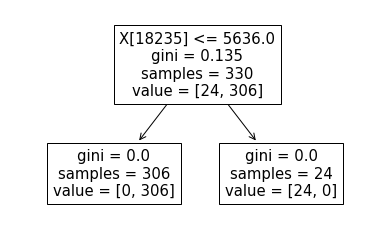

In [13]:
DTC = DecisionTreeClassifier()
dtc = DTC.fit(XX1_train, y_train)
y_pred = dtc.predict(XX1_test)

print('Accuracy =', accuracy_score(y_test,y_pred))
print('Number of features used =', dtc.n_outputs_)

print('confusion matrix:', confusion_matrix(y_test,y_pred), sep='\n')
print()
print('classification_report', classification_report(y_test,y_pred), sep='\n')

print()
plot_tree(dtc)

In [14]:
X2 = X[gini_degs_100]
X2.shape

(551, 100)

In [15]:
# No. of features vs. accuracy
from sklearn.svm import SVC
acc_list = []
X2 = X[gini_degs_100]
for i in range(1, X2.shape[1]-1):
    xx = X2.iloc[:,list(range(i))]
    X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.40, random_state=42)
    svc = SVC(kernel='linear')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))

# plt.plot(acc_list)
# plt.show()

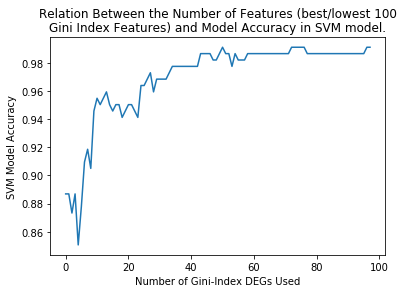

In [20]:
from textwrap import wrap
plt.plot(acc_list)
plt.title('\n'.join(wrap('Relation Between the Number of Features (best/lowest 100 Gini Index Features) and Model Accuracy in SVM model.', 60)))
plt.xlabel('Number of Gini-Index DEGs Used')
plt.ylabel('SVM Model Accuracy')
plt.savefig('DEGsGiniSVM')
plt.show()